# Introduction to Pandas
In this section of the course we will learn how to use pandas for data analysis.

You can think of pandas as an extremely powerful version of Excel, with a lot more features, the main advantage of being, pandas can open very large files very easily. Especially, if you have an excel file with more than 40,000 rows, It becomes a cumbersome exercise to keep working with excel.

In this section of the course, we will go through the topics in this order:

Introduction to Pandas

1. Series
2. DataFrames
3. Operations
3. Missing Data
4. Data Input and Output
5. GroupBy
6. Merging,Joining,and Concatenating 



# Series 

The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object).
What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. 

It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.
Let's explore this concept through some examples:

In [2]:
import numpy as np
import pandas as pd

In [4]:
labels = ['a','b','c']
my_list = [10,20,30]

# Create a numpy array  and a dictionary 
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [5]:
# Create a series by passing the list and labels index. Series is just like a numpy array
# the only difference is you can access the data using labels instead of numbers

series1 = pd.Series(data = my_list,index = labels)
series1

a    10
b    20
c    30
dtype: int64

In [6]:
# you can pass a dictionary directly to get a series
series2 = pd.Series(d)
series2

a    10
b    20
c    30
dtype: int64

In [7]:
# Now, we are creating the series by passing a numpy array 

series3 = pd.Series(arr,labels)
series3

a    10
b    20
c    30
dtype: int64

# Using an Index
The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary). Let's see some examples of how to grab information from a Series. Let us create two series, seriesA and seriesB:

In [8]:
seriesA = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan']) 
seriesA

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [9]:
seriesB = pd.Series([5,6,7,8],index = ['USA', 'Australia','UK', 'Japan']) 
seriesB

USA          5
Australia    6
UK           7
Japan        8
dtype: int64

In [10]:
# If we want to access the data, we use the label as index 
seriesA['USA']

1

In [11]:
seriesB['UK']

7

In [12]:
# you can also perform operations using series indexes
# if the data is not there or you forcefully try to add the series , 
# then it will create a NaN object
seriesC = seriesA + seriesB
seriesC

Australia     NaN
Germany       NaN
Japan        12.0
UK            NaN
USA           6.0
USSR          NaN
dtype: float64

# DataFrames
DataFrames are the workhorse of pandas and are directly inspired by the R programming language.

We can think of a DataFrame as a bunch of Series objects put together to share the same index. 
Imagine dataframes as a collection of series- added as columns . Now we can give column labels too.

Let's use pandas to explore this topic!


In [4]:
# lets create a numpy array of random integers
arr = np.random.randint(1,100,20)

In [7]:
# Now, lets create a dataframe. This is the syntax 
# .reshape function is just to change the numpy array as per your required dimensions
df = pd.DataFrame(arr.reshape(4,5),index = ['A','B','C','D'],columns=['P','Q','R','S','T'])
df

,P,Q,R,S,T
A,11,57,28,43,49
B,76,16,99,4,62
C,42,37,91,23,68
D,55,99,99,51,39


In [15]:
# you can also pass a string and then use the split operator to create the index as shown below
df1 = pd.DataFrame(arr.reshape(4,5),index = 'A B C D'.split(),columns=['P','Q','R','S','T'])
df1

,P,Q,R,S,T
A,92,76,51,16,29
B,63,43,37,27,2
C,18,65,2,80,42
D,79,70,99,2,60


# Selection and Indexing
Now , we have created the dataframe, we will now explore the various ways to access the dataframe

In [16]:
# If you want to get a single column, 
df['Q']
# df['P'] or df['R'] or df['S'] or df['T']  works 

A    76
B    43
C    65
D    70
Name: Q, dtype: int64

In [17]:
# if you want to access 2 columns at the same time, pass it as a list of columns 
df[['P','Q']]

,P,Q
A,92,76
B,63,43
C,18,65
D,79,70


In [9]:
# The same concept can be extended to more than 2 columns too 
df[['P','Q','R']]

,P,Q,R
A,11,57,28
B,76,16,99
C,42,37,91
D,55,99,99


In [19]:
# if you want to access specific rows using the index , we have to use the dot operator --> .loc[pass the index] 
df.loc['A']

P    92
Q    76
R    51
S    16
T    29
Name: A, dtype: int64

In [20]:
# if you want more than one row , pass the index as a list
df.loc[['A','B']]

,P,Q,R,S,T
A,92,76,51,16,29
B,63,43,37,27,2


In [21]:
# same example, carried for 
df.loc[['A','C']]

,P,Q,R,S,T
A,92,76,51,16,29
C,18,65,2,80,42


In [11]:
# how to access specific rows and columns 
# first access specific rows using the .loc operator, then select specific columns after that like shown below
df.loc[['B','C','D']][['R','S','T']]

,R,S,T
B,99,4,62
C,91,23,68
D,99,51,39


In [15]:
df.iloc[2]

P    42
Q    37
R    91
S    23
T    68
Name: C, dtype: int32

In [23]:
# use can also select column first and then row later
df[['P','R','T']].loc[['A','C','D']]

,P,R,T
A,92,51,29
C,18,2,42
D,79,99,60


In [24]:
# How to create a new column or new row in addition to the existing data frame

In [25]:
df

,P,Q,R,S,T
A,92,76,51,16,29
B,63,43,37,27,2
C,18,65,2,80,42
D,79,70,99,2,60


In [17]:
df['new_col'] = df['P'] + df['Q'] + df['R']+ df['S']

In [18]:
df

,P,Q,R,S,T,new_col
A,11,57,28,43,49,139
B,76,16,99,4,62,195
C,42,37,91,23,68,193
D,55,99,99,51,39,304


In [19]:
# to create a new row , use the .operator and use .loc syntax 
df.loc['new_row'] = df.loc['A'] + df.loc['B']

In [20]:
# check the dataframe again 
df

,P,Q,R,S,T,new_col
A,11,57,28,43,49,139
B,76,16,99,4,62,195
C,42,37,91,23,68,193
D,55,99,99,51,39,304
new_row,87,73,127,47,111,334


In [21]:
# How to delete rows and columns , we use the .drop syntax 
# if you want to drop columns, you give axis =1. 
# in Python, and in especially pandas, axis =1 indicates columns and axis=0 indicates rows 
df.drop('new_col',axis=1, inplace = True)

In [22]:
# It wont drop the column until you give inplace= True condition 
df

,P,Q,R,S,T
A,11,57,28,43,49
B,76,16,99,4,62
C,42,37,91,23,68
D,55,99,99,51,39
new_row,87,73,127,47,111


In [32]:
df.drop('new_col', axis=1, inplace= True )
# now it will drop that column properly 

In [33]:
df

,P,Q,R,S,T
A,92,76,51,16,29
B,63,43,37,27,2
C,18,65,2,80,42
D,79,70,99,2,60
new_row,155,119,88,43,31


In [23]:
# if you want to drop the row permanently use the same syntax, 
# except for that , use axis=0
df.drop('new_row',axis=0,inplace=True)

In [24]:
df

,P,Q,R,S,T
A,11,57,28,43,49
B,76,16,99,4,62
C,42,37,91,23,68
D,55,99,99,51,39


# Conditional selection 

In [28]:
df

,P,Q,R,S,T
A,11,57,28,43,49
B,76,16,99,4,62
C,42,37,91,23,68
D,55,99,99,51,39


In [30]:
# Select all rows where value of P is greater than 30 
df[df['P']>30]

,P,Q,R,S,T
B,76,16,99,4,62
C,42,37,91,23,68
D,55,99,99,51,39


In [38]:
# select all data where the value is more than 50 
# if the data is missing, it will fill it with NaN values 
df[df > 50]

,P,Q,R,S,T
A,92.0,76.0,51.0,NaN,NaN
B,63.0,NaN,NaN,NaN,NaN
C,NaN,65.0,NaN,80.0,NaN
D,79.0,70.0,99.0,NaN,60.0


In [31]:
df

,P,Q,R,S,T
A,11,57,28,43,49
B,76,16,99,4,62
C,42,37,91,23,68
D,55,99,99,51,39


In [32]:
# multiple selection criteria 
df[(df['P'] > 20) & (df['T'] < 50)]

,P,Q,R,S,T
D,55,99,99,51,39


In [40]:
# suppose , if you want to incorporate the OR condition.
df[(df['P'] > 20) | (df['T'] < 50)]

,P,Q,R,S,T
A,92,76,51,16,29
B,63,43,37,27,2
C,18,65,2,80,42
D,79,70,99,2,60


In [33]:
# let us create a new data frame called df to explain the operations in pandas
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})

In [34]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


# Operations

In [35]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [36]:
# To find the unique elements 
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [37]:
# if you want to find the number of unique elements 
df['col2'].nunique()

3

In [40]:
# we can also count how many times a particular value is present in the dataframe 
df['col2'].value_counts().head()

444    2
555    1
666    1
Name: col2, dtype: int64

In [49]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]
newdf

,col1,col2,col3
3,4,444,xyz


In [50]:
new1df = df[(df['col1']>2) | (df['col2']==444)]
new1df

,col1,col2,col3
0,1,444,abc
2,3,666,ghi
3,4,444,xyz


# Most Useful -> Applying Functions

In [52]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [53]:
def multby2(x):
    return (x*2)

In [54]:
# We can use a function to effect changes over the entire dataframe and store it in a different column
df['col4'] = df['col2'].apply(multby2)
df

,col1,col2,col3,col4
0,1,444,abc,888
1,2,555,def,1110
2,3,666,ghi,1332
3,4,444,xyz,888


In [55]:
# In most cases, we use the lambda function to write the code in a single line 
df['col4'] = df['col2'].apply(lambda x : x*3)
df

,col1,col2,col3,col4
0,1,444,abc,1332
1,2,555,def,1665
2,3,666,ghi,1998
3,4,444,xyz,1332


In [56]:
# We can also find the length of each string in the col3 and store it in col5. Here we pass the inbuilt function directly
df['col5'] = df['col3'].apply(len)

In [57]:
df

,col1,col2,col3,col4,col5
0,1,444,abc,1332,3
1,2,555,def,1665,3
2,3,666,ghi,1998,3
3,4,444,xyz,1332,3


In [58]:
# We want to get the index and column names, we can easily do by the following syntax 
df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5'], dtype='object')

In [62]:
df

,col1,col2,col3,col4,col5
0,1,444,abc,1332,3
1,2,555,def,1665,3
2,3,666,ghi,1998,3
3,4,444,xyz,1332,3


In [63]:
# deleting a column 
del df['col4']

In [65]:
# deleting another column col5
del df['col5']

In [66]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


# Set_Index and Reset-Index

In [67]:
# if you want to reset index 
df.reset_index()

,index,col1,col2,col3
0,0,1,444,abc
1,1,2,555,def
2,2,3,666,ghi
3,3,4,444,xyz


In [68]:
# if you want to set index to a particular string 
df['Class'] = 'A B C D'.split()

In [69]:
df

,col1,col2,col3,Class
0,1,444,abc,A
1,2,555,def,B
2,3,666,ghi,C
3,4,444,xyz,D


In [70]:
df.set_index('Class',inplace=True)
df

,col1,col2,col3
Class,,,
A,1,444,abc
B,2,555,def
C,3,666,ghi
D,4,444,xyz


In [71]:
# Now , we can access the data using the .loc operator 
df.loc['A']

col1      1
col2    444
col3    abc
Name: A, dtype: object

# Sorting

In [72]:
df

,col1,col2,col3
Class,,,
A,1,444,abc
B,2,555,def
C,3,666,ghi
D,4,444,xyz


In [73]:
# you can sort by the values in a particular column 
df['col2'].sort_values(ascending=True)

Class
A    444
D    444
B    555
C    666
Name: col2, dtype: int64

In [74]:
# you can sort the entire data frame by the values in a particular column 
df.sort_values(by='col2',ascending = False)

,col1,col2,col3
Class,,,
C,3,666,ghi
B,2,555,def
A,1,444,abc
D,4,444,xyz


# Renaming columns

In [75]:
# we pass the values in a dictionary 
df.rename(columns= {'col1':'Roll Number','col2':'Marks','col3':'Student_Name'},inplace=True)

In [76]:
df

,Roll Number,Marks,Student_Name
Class,,,
A,1,444,abc
B,2,555,def
C,3,666,ghi
D,4,444,xyz


In [77]:
# We can now sort using multiple conditions 
df.sort_values(by=['Marks','Student_Name'])

,Roll Number,Marks,Student_Name
Class,,,
A,1,444,abc
D,4,444,xyz
B,2,555,def
C,3,666,ghi


# Treating Missing Values

In [79]:
import numpy as np
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [80]:
# How to find the number of missing values in each column, we have a small trick here
# We can use the combination of isnull and sum functions 
# isnull() returns a boolean operator , 1- True and 0- False and sum() sums all the one's or True outputs
df.isnull().sum()

col1    1
col2    1
col3    0
dtype: int64

In [81]:
# We want to drop the missing values, how would you go about doing that ??
# dropna function actually removes all the rows and columns which has the missing values - characterised by NaN presence
df.dropna()

,col1,col2,col3
1,2.0,555.0,def
2,3.0,666.0,ghi


In [82]:
# Now you dont want to drop the columns which has missing values 
df.dropna(axis=1)

,col3
0,abc
1,def
2,ghi
3,xyz


In [83]:
# Now you dont want to drop the rows which has missing values 
# remember in pandas, axis=0 means rows and axis =1 means columns 
df.dropna(axis=0)

,col1,col2,col3
1,2.0,555.0,def
2,3.0,666.0,ghi


In [84]:
# when we check the dataframe, we notice that dataframe is still intact
# Thats because we have not given inplace= True in our command
# when we give inplace= True, it gives a permanent change 
df

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [85]:
# If we want to fill all the missing values with a string, we can use this command
df.fillna(value='FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [86]:
# you also have some flexibility with the number of missing values you can keep in the columns 
df.dropna(axis = 1, thresh=1)
# thresh actually accounts for the number of non-missing values that should be in the columns 

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [87]:
df1 = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [88]:
df1.dropna(axis=1,thresh = 2)
# so , in essence, axis=1 drops columns and thresh=2 says you should have atleast 2 non-missing values in those cols.

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [89]:
df1

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [90]:
# so in most of the cases, in order to not lose information, we rarely drop the columns , 
# we generally fill all the missing values by the mean value of the column 

In [91]:
# let us take column A , we can do it by this command
df1['A'].fillna(value = df1['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Data Input and Output 

In [94]:
# In order to read the csv file or the excel file, make sure that the data is stored in the working directory
# we can find the working directory you are on by the simple command as shown below -pwd

In [95]:
# I have a sample excel file stored in the working directory and I have just read that csv file 
df = pd.read_csv('example.csv')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [96]:
# pandas can read the excel files too, but it does not import images or formulas
# if you have an excel file with macros or images, then reading through pandas might cause the application to crash 

In [97]:
df1 = pd.read_excel('Excel_Sample.xlsx',sheet_name='Sheet1')
df1
# its very important to give the sheet_name when you are reading the excel file, especially if you have data 
# with multiple sheets 

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [98]:
# CSV Output 
df.to_csv('example3',index=False)

In [99]:
# Excel output 
df.to_excel('Excel_Sample2.xlsx',sheet_name='Sheet1')

In [100]:
# Once you read the file , the following commands are very common and its used as standard commands to understand 
# the data 

# to check the head of the file --> gives the first 5 rows 
# if you want the first n rows --> you can give the command # df.head(n) where n depicts the number of rows. 
df.head()

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [101]:
# if you want to see the last 5 rows , you can give the tail() command 
df.tail()

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [102]:
df.tail(2)
# gives the last 2 rows 

,a,b,c,d
2,8,9,10,11
3,12,13,14,15


# Date-Time Objects 

In [103]:
df= pd.read_csv('http://bit.ly/uforeports')

In [104]:
# I have now read a ufo reports file. I want to check the size of the file.
# shape is a good function to use , to check the number of rows and columns 
# we ahve 18241 rows and 5 columns in this data set 
df.shape

(18241, 5)

In [105]:
# let us check the first 5 rows 
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [106]:
# you can check the data type of each column using the below command 
# everything is a object in this dataframe 
df.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [107]:
# we want to check the missing value sum in each column in the data frame 
# we can find that there is a lot of missing Colors reported data . out of 18241 rows, we dont have data for 15,359 rows
# should we use the colors reported data ? What can we do now ? These are questions we have to answer 
df.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [108]:
# let us analyze how the timestamp column 
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [109]:
df['Time'].str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [110]:
# best way to analyze the time is to convert into datatime object 
df['Time'] = pd.to_datetime(df['Time'])

In [111]:
df.dtypes
# check that time is now a datetime object 

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [112]:
# we can create a year column from the timestamp data 
df['Year']= df['Time'].dt.year

In [113]:
df['Month'] = df['Time'].dt.month

In [114]:
# we can now get more insights from the data , like most of the activity happens in the 6th and 7th month
df['Month'].value_counts()

6     3059
7     2345
8     1948
10    1723
9     1635
11    1509
5     1168
3     1096
4     1045
12    1034
1      862
2      817
Name: Month, dtype: int64

In [115]:
df['Year'].value_counts().head()
# top 5 years where the UFO was seen 

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
Name: Year, dtype: int64

In [116]:
# You can check out all the other functions at 
# https://pandas.pydata.org/pandas-docs/stable/api.html#datetimeindex

In [117]:
df.info()
# General information on all the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 7 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null datetime64[ns]
Year               18241 non-null int64
Month              18241 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 997.6+ KB


# Groupby 

In [118]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [119]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [120]:
# Let us do some groupby functions 

In [121]:
df.groupby(['Company']).sum()

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [122]:
df.groupby(['Company']).std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [123]:
df.groupby(['Company']).mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [124]:
df.groupby(['Company']).min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [125]:
df.groupby(['Company']).max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [126]:
# Let us try an another example

In [127]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [128]:
drinks.shape
# We have 193 rows and 6 columns 

(193, 6)

In [129]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [130]:
drinks['beer_servings'].mean()

106.16062176165804

In [131]:
drinks.groupby(['continent'])['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [132]:
drinks.groupby(['continent'])['beer_servings'].agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [133]:
drinks.groupby(['continent']).mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [134]:
%matplotlib inline

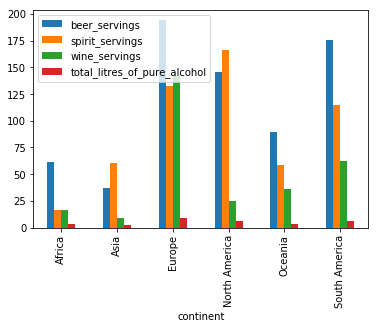

In [135]:
drinks.groupby(['continent']).mean().plot(kind='bar')

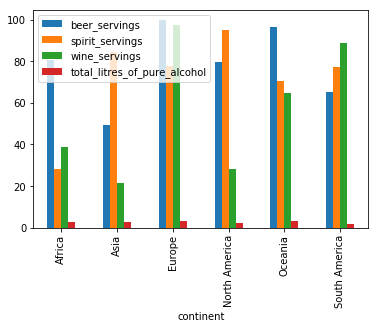

In [136]:
drinks.groupby(['continent']).std().plot(kind='bar')

# Merging Joining and Concatenating

In [137]:
# There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating. 
#In this lecture we will discuss these 3 methods with examples.

In [138]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [139]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

In [140]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [141]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [142]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [143]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


# Concatenation
Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use pd.concat and pass in a list of DataFrames to concatenate together:

In [145]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [146]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


# Example Dataframes

In [148]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']}) 

In [149]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [150]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


# Merging
The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [151]:
pd.merge(left,right,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


# Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [153]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [154]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [155]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [156]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [157]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# https://pandas.pydata.org/pandas-docs/stable/

This notebook is just an introduction to pandas. Please follow the above link and do further exploration to understand 
the concepts better. 